In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
def dft2d(image):
    return np.fft.fft2(image)

def idft2d(F):
    return np.fft.ifft2(F)

Question_1

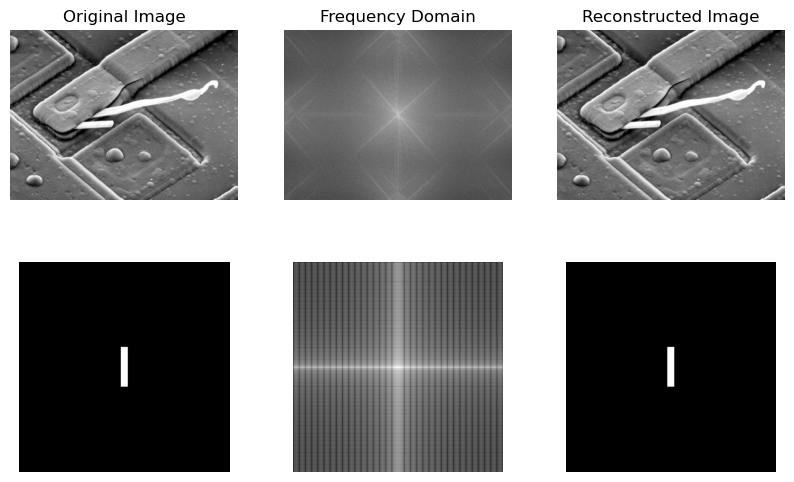

In [18]:
# Load the image and convert it to grayscale
image_1 = Image.open('Fig0429(a)(blown_ic).bmp').convert('L')
image_array_1 = np.array(image_1)
image_2 = Image.open('Fig0424(a)(rectangle).bmp').convert('L')
image_array_2 = np.array(image_2)

# Display the original image
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(image_array_1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Apply Fourier Transform and shift the zero-frequency component to the center
f_transform = dft2d(image_array_1)
f_transform_shifted = np.fft.fftshift(f_transform)

# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log scale for visibility

# Display the Fourier Spectrum
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain")
plt.axis('off')

# Apply Inverse Fourier Transform to reconstruct the image
f_ishift = np.fft.ifftshift(f_transform_shifted)
reconstructed_image = idft2d(f_ishift)
reconstructed_image = np.abs(reconstructed_image)

# Display the reconstructed image
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

# Another image
plt.subplot(2, 3, 4)
plt.imshow(image_array_2, cmap='gray')
plt.axis('off')

f_transform = dft2d(image_array_2)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

plt.subplot(2, 3, 5)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

f_ishift = np.fft.ifftshift(f_transform_shifted)
reconstructed_image = idft2d(f_ishift)
reconstructed_image = np.abs(reconstructed_image)

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

plt.show()


Question_2

In [19]:
def ideal_lowpass_filter(shape, cutoff):
    
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_lp = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            if distance <= cutoff:
                filter_lp[u, v] = 1
    return filter_lp

In [20]:
def ideal_highpass_filter(shape, cutoff):
    
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_hp = np.ones((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - center_row) ** 2 + (v - center_col) ** 2)
            if distance <= cutoff:
                filter_hp[u, v] = 0
    return filter_hp

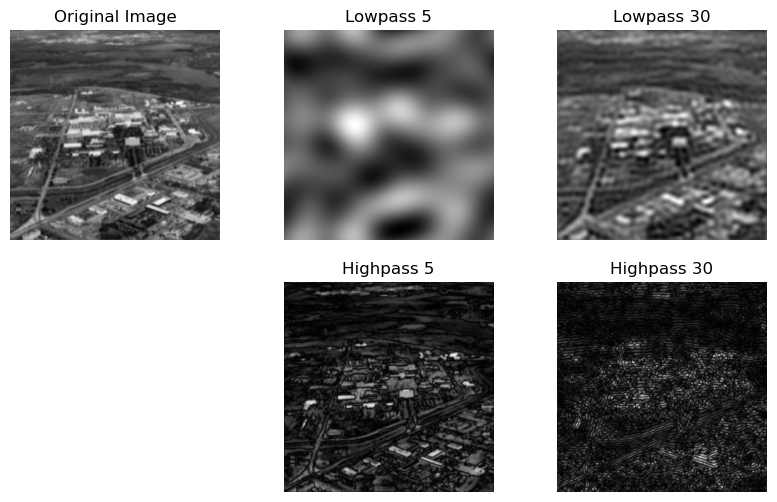

In [35]:
# read images
image = Image.open('Fig0525(c)(aerial_view_turb_c_0pt001).bmp').convert('L')
image_array = np.array(image)

# Fourier transfer
F = dft2d(image_array)

# shift zero frequency to center
F_shifted = np.fft.fftshift(F)  

# setting
cutoff1, cutoff2 = 5, 30

# filter kernel function: H(u, v)
lp_filter1 = ideal_lowpass_filter(F.shape, cutoff1)
lp_filter2 = ideal_lowpass_filter(F.shape, cutoff2)
hp_filter1 = ideal_highpass_filter(F.shape, cutoff1)
hp_filter2 = ideal_highpass_filter(F.shape, cutoff2)

# Fourier transform of the image: F(u, v) * H(u, v) =  Frequency-domain Filtering: G(u, v)
F_lp1 = F_shifted * lp_filter1
F_lp2 = F_shifted * lp_filter2
F_hp1 = F_shifted * hp_filter1
F_hp2 = F_shifted * hp_filter2

# plot the result
filtered_images = {
    'Lowpass 5': np.abs(idft2d(np.fft.ifftshift(F_lp1))),
    'Lowpass 30': np.abs(idft2d(np.fft.ifftshift(F_lp2))),
    'Highpass 5': np.abs(idft2d(np.fft.ifftshift(F_hp1))),
    'Highpass 30': np.abs(idft2d(np.fft.ifftshift(F_hp2))),
}

plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')
for i, (title, filtered_img) in enumerate(filtered_images.items(), start=2):
    if i > 3 :
        i += 1
    plt.subplot(2, 3, i)
    plt.title(title)
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')

plt.show()


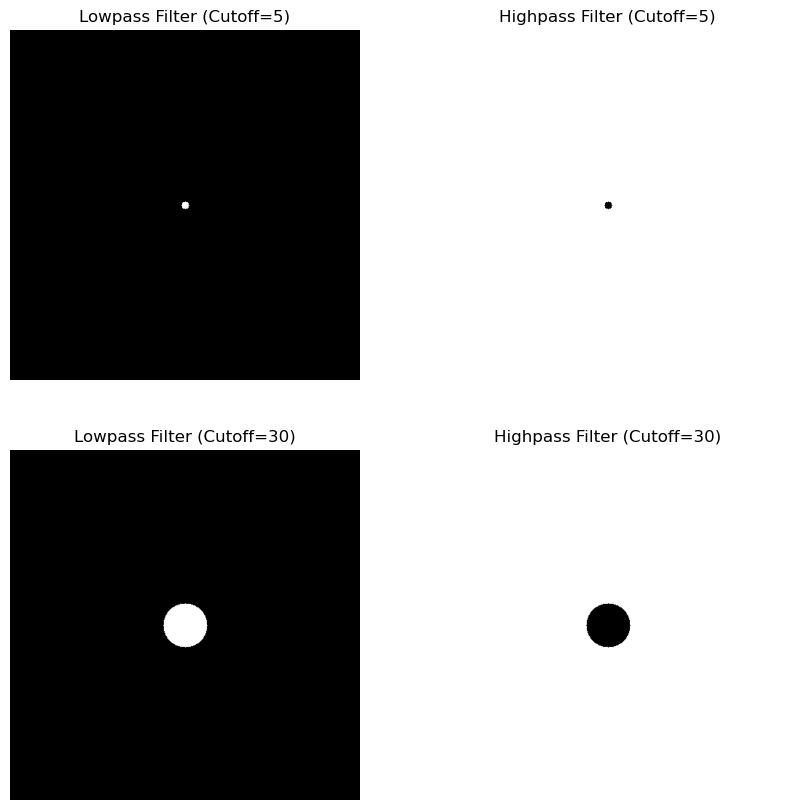

In [38]:
# show the kernel functions
filters = {
    "Lowpass Filter (Cutoff=5)": lp_filter1,
    "Highpass Filter (Cutoff=5)": hp_filter1,
    "Lowpass Filter (Cutoff=30)": lp_filter2,
    "Highpass Filter (Cutoff=30)": hp_filter2,
}

plt.figure(figsize=(10, 10))
for i, (title, kernel_function) in enumerate(filters.items(), start=1):
    plt.subplot(2, 2, i)
    plt.title(title)
    plt.imshow(kernel_function, cmap='gray')
    plt.axis('off')
    
plt.show()